# Introduction
De plus en plus, le monde qui nous entoure se numérise. L'essor des technologies numériques pose une question grandissante : comment transformer les informations analogiques de notre environnement en informations numériques pouvant être stockées et traitées dans nos appareils ?

Nous verrons à travers cette activité quels sont les paramètres importants du processus de numérisation et de la façon dont on stocke l'information. Elle prendra la forme d'un Notebook Jupyter, qui vous permettra de faire vos propres réglages et de simuler un échantillonage de façon interactive.

Même si toutes ces connaissances s'appliquent à plusieurs types de grandeurs physiques, nous prendrons par la suite l'exemple du son car il nous permettra d'entendre les changements que l'on fait aux paramètres d'échantillonnage et de compression !

Avant de poursuivre dans ce notebok Jupyter il sera nécessaire d'installer quelques librairies pour la gestion du son en exécutant le code suivant. Une fois que c'est fait vous êtes parés poure découvrir le monde du traitement de l'information !

In [1]:
import sys
!{sys.executable} -m pip install librosa
!{sys.executable} -m pip install resampy
!{sys.executable} -m pip install wavio

import matplotlib.pyplot as plt
from matplotlib.ticker import (StrMethodFormatter)
import numpy as np
import sounddevice as sd
import time
import librosa
import resampy
import random as rnd
import wavio

## Analogique et numérique
Mais d'abord, qu'est-ce qu'une information analogique ou numérique ?

Les informations analogiques sont celles qui nous entourent dans la vraie vie. Elle sont **continues**, c'est-à-dire qu'entre deux points d'information il y a une infinité de points intermédiaires. Par exemple, si on prend une onde sonore sinusoïdale, nous aurons une infinité de points constituant la courbe.

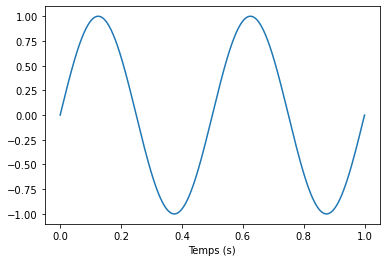

In [2]:
# Fréquence de la sinusoïde (Hz)
f = 2

x = np.linspace(0, 1, 1000)
y = np.sin(x*2*np.pi*f)

plt.plot(x, y)
plt.xlabel("Temps (s)")
plt.show()

Maintenant, dans le cas des informations numériques, elles ont pour but d'être stockées dans un appareil numérique. Ceci signifie que la capacité de stockage de ces informations est finie. Nous ne pouvons donc pas stocker une infinité de points, comme c'est le cas dans la monde réel. Les informations numériques comportent donc un nombre fini de points. La courbe est **discontinue**.

In [3]:
nombre_points = 20

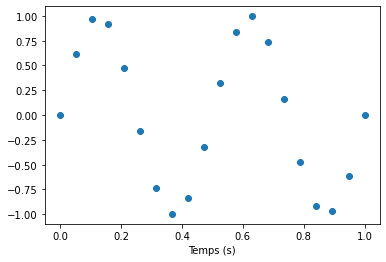

In [4]:
# Fréquence de la sinusoïde (Hz)
f = 2

x = np.linspace(0, 1, nombre_points)
y = np.sin(x*2*np.pi*f)

plt.plot(x, y, 'o')
plt.xlabel("Temps (s)")
plt.show()

Nous voyons bien alors que la version numérisée de notre onde sinusoïdale est une version dégradée de celle-ci. **L'étape de numérisation perd des données.** C'est pour cette raison qu'il est important de bien connaître l'étape d'échantillonnage, le passage de l'analogique au numérique, afin de perdre le moins de données possible lors du passage au numérique.

# Représentation de l’information dans un ordinateur : une question de nombres

Comme nous l'avons expliqué, les informations dans un ordinateur (ou tout autre appareil numérique) sont stockées au format numérique. Ce n'est qu'une façon de dire que l'on stocke une suite de nombres. Sur l'exemple précédent, nous pouvons représenter notre onde de façon numérique avec la suite de nombres ci-dessous.


In [5]:
print(y)

[ 0.00000000e+00  6.14212713e-01  9.69400266e-01  9.15773327e-01
  4.75947393e-01 -1.64594590e-01 -7.35723911e-01 -9.96584493e-01
 -8.37166478e-01 -3.24699469e-01  3.24699469e-01  8.37166478e-01
  9.96584493e-01  7.35723911e-01  1.64594590e-01 -4.75947393e-01
 -9.15773327e-01 -9.69400266e-01 -6.14212713e-01 -4.89858720e-16]


Ici, nous avons utilisé 10 points, et nous voyons qu'une forme de sinusoïde s'esquisse déjà. On remarque cependant qu'on pourrait améliorer la représentation de notre sinusoïde en augmentant le nombre de points.

### ACTIVITÉ : 
*Changez le nombre de points que vous souhaitez utiliser pour numériser la sinusoïde en changeant le paramètre nombre_points puis exécutez à nouveau les deux derniers blocs de code. Quel réglage permet de s'approcher au mieux de la courbe analogique ?*

In [6]:
nombre_points = 100 # Ce paramètre peut être modifié

Nous voyons que la courbe numérisée est de plus en plus fidèle à la courbe analogique lorsque l'on augmente le nombre de points. C'est ce que nous allons voir dans la prochaine partie.

# Premier paramètre de l'échantillonnage : la fréquence d'échantillonnage
On appelera échantillonnage le fait de prélever, sur un signal analogique en entrée, des points de données à des intervalles réguliers pour obtenir un signal numérique. Il s'agit donc de la conversion analogique vers numérique. C'est ce qu'on a fait ci-dessus avec notre sinusoïde.

La fréquence d'échantillonnage est un paramètre très important du processus d'échantillonnage. C'est l'équivalent du nombre de points que nous avons choisi dans l'exemple ci-dessus. La fréquence d'échantillonnage est définie comme le nombre d'échantillons (points) prélevés par unité de temps. Ainsi, si sur un signal analogique qui varie dans le temps nous prélevons 10 échantillons par seconde nous aurons une fréquence d'échantillonnage de $10 \text{ Hz}$.

Nous avons vu dans la partie pécédente ce que cela faisait sur une courbe sinusoïdale. Nous allons maintenant l'appliquer à un cas de la vie quotidienne : la musique. En effet, la musique que nous écoutons avec nos appareils numériques est sous format numérique (comme par exemple le mp3), ce qui signifie qu'elle a été échantillonnée en amont. Pour l'échantillonner il a fallu choisir une fréquence d'échantillonnage. Nous allons maintenant modifier cette fréquence d'échantillonnage sur un fichier audio.

Il vous faudra d'abord installer un package Python en exécutant le bloc suivant :

Maintenant vous pouvez lancer la lecture des 10 premières secondes d'un fichier audio (le fichier peut mettre un peu de temps à être téléchargé, n'oubliez pas de monter le son de votre appareil).

In [7]:
freq_ech = 44100

In [8]:
clip, sr_orig = librosa.load(librosa.util.example_audio_file(), sr=None)

clip_low = resampy.resample(clip, sr_orig, freq_ech)

sd.play(clip_low, freq_ech)
time.sleep(10)
sd.stop()


Pour l'instant tout est normal. Essayons de changer la fréquence d'échantillonnage. Choisissons par exemple 10 000 Hz. Exécutez à nouveau le bloc précédent. Qu'est-ce qu'il s'est passé ? N'hésitez pas à essayer plusieurs fréquences d'échantillonnage différentes.

In [9]:
freq_ech = 1000 # Ce paramètre peut être modifié

En effet, au fur et à mesure que nous baissons la fréquence d'échantillonnage, la qualité du son devient de moins en moins bonne. Comme tout à l'heure pour notre sinusoïde, plus on a de points, plus la courbe échantillonnée se rapproche de la courbe analogique.

## Comment choisir sa fréquence d'échantillonnage ?
Nous avons déterminé qu'une fréquence d'échantillonnage trop faible détériore la qualité de l'information (ici du son). Alors pourquoi ne pas choisir une très grande fréquence d'échantillonnage ?

La problème réside dans le stockage des données échantillonnées. En effet, plus on prélève d'échantillons par seconde, plus on aura de données à stocker. Chacun des échantillons est représenté par un nombre qui prend de la place dans nos disques durs. Ainsi plus d'échantillons équivaut à plus de stockage nécessaire pour sauvegarder notre signal. Comme nous voulons avoir des fichiers les moins volumineux possible, nous souhaitons savoir à quel point nous pouvons choisir une fréquence d'échantillonnage faible sans compromettre la qualité de l'échantillonnage.

La réponse fut apporté par l'ingénieur Shannon dans les années 60. Pour éviter le repliement de spectre (qui se traduit par une dégradation de la qualité de l'échantillonnage) il est nécessaire que la fréquence d'échantillonnage $f_{E}$ soit **au moins** de deux fois la fréquence du signal échantillonné $f$. Cela se traduit mathématiquement par $$2f \le f_{E}.$$

Il est important ici de différencier la fréquence d'échantillonnage et le fréquence du signal. Dans l'exemple de l'introduction par exemple, la fréquence de la sinusoïde était de 2 Hz : le motif se répétait à l'identique deux fois par seconde. La fréquence du signal est une grandeur propre au signal analogique, avant échantillonnage. La fréquence d'échantillonnage elle est le nombre de fois où on va prélever la valeur du signal analogique par seconde. C'est un réglage que nous pouvons modifier. C'est d'ailleurs ce que nous avons fait dans l'introduction et avec le fichier audio !

Vous savez certainement que dans la vie réelle les signaux sont rarement tous sinusoïdaux et ils ne sont souvent pas périodiques. Regardez par exemple à quoi ressemble un tout petit bout de la musique que nous avons utilisé précédemment :

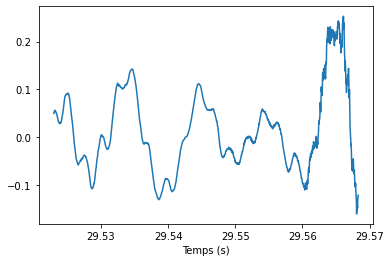

In [10]:
slice_size = 2000
if len(clip) > slice_size:
    clip_slice = int(rnd.random()*(len(clip) - slice_size))
    clip_ts = np.arange(clip_slice, clip_slice + slice_size, 1)/sr_orig
    plt.plot(clip_ts, clip[clip_slice:clip_slice + slice_size])
    plt.xlabel("Temps (s)")
    plt.show()
else:
    print('Audio trop court')

Dans ce cas à quelle fréquence $f$ s'applique le théorème de Shannon ? Il faudra utiliser la fréquence maximale de la décomposition de Fourier du signal $f_{m}$. Si vous ne savez pas ce que cela signifie ce n'est pas grave. Ce qu'il faut retenir c'est que le théorème de Shannon s'applique à la fréquence maximale contenue dans le signal (par exemple, dans le cas du son il s'agit de la fréquence la plus aigue de l'audio). On a ainsi le théorème de Shannon généralisé $$2f_{m} \le f_{E}.$$

## Fréquence d'échantillonnage dans le domaine du son
Nous allons pouvoir appliquer ce que nous venons d'apprendre au cas de la musique. Revenons à notre problème d'échantillonnage : nous voulons échantillonner un signal sonore analogique. Comment choisir la fréquence d'échantillonnage pour ne pas perdre de qualité lors de l'échantillonnage du signal tout en minimisant l'espace de stockage nécessaire ?

Nous venons de voir que la fréquence d'échantillonnage doit être au moins le double de la fréquence maximale de notre signal pour ne pas trop dégrader le signal échantillonné. Comme nous voulons la plus petite fréquence d'échantillonnage pour minimiser la taille de notre fichier nous allons prendre une fréquence d'échantillonnage tout pile égale à deux fois la fréquence maximale de notre signal. Soit $$f_{E} = 2 f_{m}.$$

Maintenant il nous reste plus qu'une élément à déterminer : quelle est la fréquence maximale de notre signal. Et bien il n'y a pas de bonne réponse, tout dépend du signal que l'on a en entrée. Cependant, dans la cas de l'audio il y a une généralité : l'oreille humaine ne peut pas entendre les fréquences au-délà de 20 kHz. Ainsi, dans la plupart des fichiers son, les fréquences ne dépassent jamais 20 kHz (parce qu'on ne les entendrait pas de toute façon). Ainsi on peut dire que $f_{m} = 20 \text{ kHz}$ pour échantillonner de la musique donc la fréquence d'échantillonnage devrait être de $f_{E} = 2f_{m} = 40 \text{ kHz}$.

Il se trouve que c'est presque exactement cette fréquence d'échantillonnage qui a été choisie pour les CDs. En effet, les CDs contiennent des fichiers audio échantillonnées à 44.1 kHz, soit à peine plus que la limite donnée par le théorème de Shannon de 40 kHz. Les raisons ayant mené à ce chiffre précis de 44.1 kHz sont de l'ordre technique et ne nous intéresseront pas dans le cadre de ce module. Nous voyons cependant que nous sommes tombés très près !

D'autres standards de fréquence d'échantillonnage existent comme le 48 kHz pour les DVD et les vidéos en général. Des fréquences d'échantillonnage allant jusqu'à 192 kHz sont utilisées dans les studios d'enregistrement pour garantir la meilleure qualité possible des fichiers son. Pour une oreille non habituée, avec un matériel d'écoute bas de gamme la différence n'est pas réellement perceptible.

# Second paramètre de l'échantillonnage : le quantum d'amplitude
Dans la partie précédente nous avons vu le paramètre temporel de l'échantillonnage : la fréquence d'échantillonnage. Ce paramètre va définir la qualité de l'échatillonnage selon l'axe du temps (en abscisses) : avec la fréquence d'échantillonnage on va pouvoir varier à quel point on prèleve souvent des échantillons de notre signal analogique.

Cependant on n'a pas encore parlé de l'axe des ordonnées. C'est là qu'interviendra notre deuxième paramètre de l'échantillonnage. Mais d'abord, quelle grandeur est échantillonnée sur l'axe des ordonnées ? La plus souvent en traitement de l'information la numérisation se fera sur une entrée en tension. C'est à dire que l'axe des ordonnées représentera une tension électrique. Ainsi pour le son par exemple, comme la grandeur qui varie est la pression de l'air et non pas une tension électrique, nous aurons besoin de convertir la pression de l'air en tension électrique avant de pouvoir numériser notre signal électrique : c'est le rôle du microphone !

Une fois que l'on a une tension en entrée, un convertisseur analogique-numérique (CAN) va convertir cette tension en une suite de nombres (les échantillons) prélevés à la fréquence d'échantillonnage définie. Cependant, il faut voir le CAN comme une balance électronique : la plupart ont une précision de un gramme. Imaginons que nous versons 12,7 grammes de farine dans un récipient sur notre balance, elle affichera certainement 13 grammes. Ainsi, il y aura des paliers à partir desquels la balance affichera la prochaine valeur de masse. C'est en quelque sorte une forme de conversion analogique-numérique. Dans le cas d'un CAN (par exemple pour enregistrer du son) on aura des paliers de tension qui correspondront à un nombre entier donné. Voyons cela de plus près.

## Qu'est-ce que le quantum d'amplitude ?
La quantum d'amplitude est la distance entre deux paliers de tension pouvant être différenciés par notre CAN. Par exemple, imaginons que sur notre exemple de la sinusoïde nous ayons un quantum de 0,25 V. Tous les points que nous avons enregistré précédemment seront alors arrondis au dixième de volt supérieur. Regardez ce que cela donne :

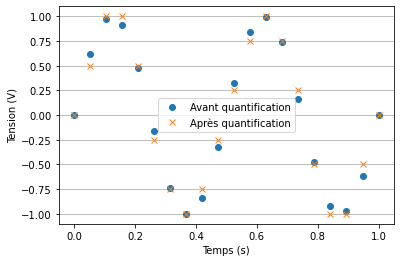

In [11]:
# Quantum d'échantillonnage (V)
q = 0.25

# Fréquence de la sinusoïde (Hz)
f = 2

x = np.linspace(0, 1, 20)
y = np.sin(x*2*np.pi*f)
y_q = np.round(y*(1/q))/(1/q)

plt.plot(x, y, 'o', label="Avant quantification")
plt.plot(x, y_q, 'x', label="Après quantification")
plt.xlabel("Temps (s)")
plt.ylabel("Tension (V)")
plt.yticks(np.arange(-1, 1.1, q))
plt.grid(True, 'major', 'y')
plt.legend()
plt.show()

Une fois que nous avons découpé notre axe des ordonnées en un certain nombre de paliers il est facile d'y assigner à chacun un nombre $N$ qui va pouvoir être enregistré dans notre disque dur. Par exemple, nous pouvons décider que 0 V correspond au nombre 0 puis que chaque palier incrémente ce nombre de 1. Ainsi, 0,25 V serait 1, 0,5 V serait 2 et ainsi de suite. Voici ce que cela donnerait sur notre exemple précédent :

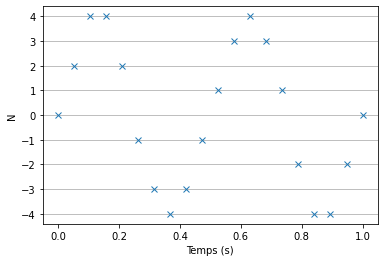

In [12]:
# Quantum d'échantillonnage (V)
q = 0.25

# Fréquence de la sinusoïde (Hz)
f = 2

x = np.linspace(0, 1, 20)
y = np.sin(x*2*np.pi*f)
y_q = (np.round(y*(1/q))/(1/q))/q

fig, ax = plt.subplots()
plt.plot(x, y_q, 'x', label="Après quantification")
plt.xlabel("Temps (s)")
plt.ylabel("N")
y_ticks = np.arange(-np.ceil(1/q), 1/q + 0.1, 1)
plt.yticks(y_ticks)
plt.grid(True, 'major', 'y')
plt.show()

Finalement, comme les ordinateurs utilisent des nombres binaires pour stocker l'information, nous représenterons ces nombres en binaire :

In [13]:
# Quantum d'échantillonnage (V)
q = 0.25

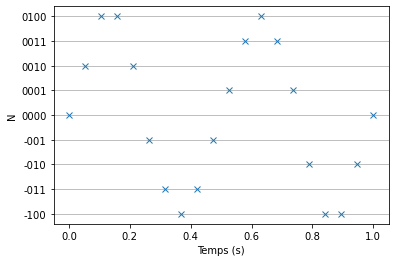

In [14]:
# Fréquence de la sinusoïde (Hz)
f = 2

x = np.linspace(0, 1, 20)
y = np.sin(x*2*np.pi*f)
y_q = (np.round(y*(1/q))/(1/q))/q

fig, ax = plt.subplots()
plt.plot(x, y_q, 'x', label="Après quantification")
plt.xlabel("Temps (s)")
plt.ylabel("N")
y_ticks = np.arange(-np.ceil(1/q), 1/q + 0.1, 1).astype(int)
ax.yaxis.set_major_formatter(StrMethodFormatter("{x:04b}"))
plt.yticks(y_ticks)
plt.grid(True, 'major', 'y')
plt.show()

Voilà, nous avons quantifié un signal sinusoïdal. N'hésitez pas à changer le quantun d'échantillonnage $q$ et à éxecuter le code ci-dessus pour voir l'effet qu'il a sur l'échantillonage. Quel paramètre semble être le meilleur ?

In [15]:
# Quantum d'échantillonnage (V)
q = 0.25 # Ce paramètre peut être modifié

## Comment choisir un bon quantum ?
Comme pour la fréquence d'échantillonnage nous remarquons que plus on augmente le nombre de paliers (et donc plus on diminue la taille du quantum) plus le signal est fidèle à l'original. L'échantillonnage sera donc de meilleure qualité. Cependant nous avons le même problème que pour la fréquence d'échantillonnage : plus on diminue la taille du quantum plus on a de paliers et donc on a besoin de nombres plus grands pour stocker l'information. Le fichier résultant sera d'autant plus volumineux que le quantum est petit.

En effet, la taille du fichier dépend du nombre de bits sur lesquels on code l'information et du nombre d'échantillons que l'on prélève. Dans l'exemple précédent que nous rappelons ici :

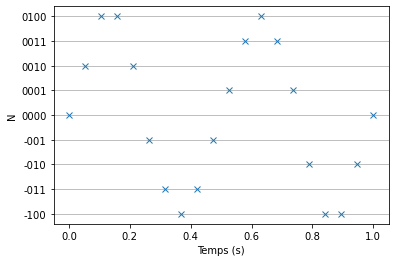

In [16]:
# Quantum d'échantillonnage (V)
q = 0.25

# Fréquence de la sinusoïde (Hz)
f = 2

x = np.linspace(0, 1, 20)
y = np.sin(x*2*np.pi*f)
y_q = (np.round(y*(1/q))/(1/q))/q

fig, ax = plt.subplots()
plt.plot(x, y_q, 'x', label="Après quantification")
plt.xlabel("Temps (s)")
plt.ylabel("N")
y_ticks = np.arange(-np.ceil(1/q), 1/q + 0.1, 1).astype(int)
ax.yaxis.set_major_formatter(StrMethodFormatter("{x:04b}"))
plt.yticks(y_ticks)
plt.grid(True, 'major', 'y')
plt.show()

nous avons des nombres codés sur 4 bits (3 pour le nombre et 1 pour le signe). Ainsi, avec une fréquence d'échantillonnage de 20 Hz une seconde d'information est constituée de $4 \times 20 = 80$ bits soit 10 octets (pour rappel 1 octet est égal à 8 bits).

Contrairement à la fréquence d'échantillonnage cependant, il n'y a pas de loi qui impose un minimum pour le nombre de paliers de quantification. Ainsi il faudra choisir judicieusement notre quantification en fonction de la précision que l'on veut avoir sur les ordonnées.

Revenons au cas de la musique. Nous allons reprendre le morceau précédent et changer la quantification. Plutôt que de spécifier un palier nous allons directement fournir le nombre de bits sur lesquels sera codée notre information. Ici par exemple nous jouons le fichier en 16 bits, ce qui est le réglage d'origine : le son est normal.

In [25]:
clip, sr_orig = librosa.load(librosa.util.example_audio_file(), sr=None)

wavio.write("audio.wav", clip, sr_orig, sampwidth=2)
w = wavio.read("audio.wav")
sr = w.rate
clip_q = w.data

sd.play(clip_q, sr)
time.sleep(10)
sd.stop()

Par contre, dans l'exemple suivant, le son est tranformé en 8 bits (nous augmentons la taille du quantum). Nous remarquons que la qualité est dégradée.

In [26]:
clip, sr_orig = librosa.load(librosa.util.example_audio_file(), sr=None)

wavio.write("audio.wav", clip, sr_orig, sampwidth=1)
w = wavio.read("audio.wav")
sr = w.rate
clip_q = w.data

sd.play(clip_q, sr)
time.sleep(10)
sd.stop()

## Quantum typiques dans le domaine du son
De même que pour la fréquence d'échantillonnage il y a certains standards pour l'échantillonnage du son. Ainsi les CDs sont numérisés en 16 bits. La musique des anciens jeux vidéos était codée en 8 bits, en effet à l'époque il y avait peu de mémoire et donc les sons étaient dégradés pour pouvoir les stocker dans les cartouches. Cela a donné lieu au classiques sons 8 bits. Les DVDs eux peuvent monter à 24 bits de profondeur. Finalement, dans les studios d'enregistrement nous pouvons trouver maintenant des fichiers audio en 32 bits.

# Quantité d'information stockée
Tout au long de ce module nous avons vu qu'il fallait limiter la fréquence d'échantillonnage ainsi que le nombre de bits par échantillon afin d'avoir des fichiers plus légers. Mais comment calculer le volume du fichier résultant d'une numérisation ?

Pour connaître la taille de l'échantillonnage d'une information analogique il nous faut connaître trois paramètres : la fréquence d'échatillonnage $f_{E}$, le nombre de bits par échantillon $n$ (ou de manière équivalente le quantum d'échantillonnage $q$) ainsi que la durée de l'échantillonnage $t$. En effet, nous prélevons $f_{E}$ échantillons par seconde, donc pendant tout l'échantillonnage nous aurons prélevé $f_{E} \times t$ échantillons (avec $t$ en secondes). Chacun de ces échantillons est codé sur $n$ bits donc le nombre total de bits $N$ enregistrés pendant l'échatillonnage est $$N = f_{E} \times t \times n.$$
Il ne faut pas oublier de diviser par 8 si on veut la réponse en octets !

## Comment passer du quantum au nombre de bits ?
Nous avons dit ci-dessus que le nombre de bits sur lequel on code un échantillon est équivalent au quantum d'échantillonnage. En effet, si un signal en tension va de 0 à $V_{0}$ par exemple le nombre d'espaces entre les paliers multiplié par la distance entre chaque palier doit donner la tension maximale $V_{0}$. Le nombre d'espaces entre les paliers est égal au nombre de paliers moins un (pensez aux clotûres et aux piquets) donc si on note $N_{p}$ le nombre de paliers et $q$ le quantum on a $$V_{0} = \left(N_{p} - 1 \right) \times q.$$
Maintenant il suffit de relier le nombre de paliers au nombre de bits sur lequel on code l'information. Avec $n$ bits on peut coder $2^{n}$ nombres différents donc on pourra avoir $N_{p} = 2^{n}$ paliers.

On obtient alors $$V_{0} = \left(2^{n} - 1\right) \times q$$ et on peut alors en déduire le lien entre quantum et nombre de bits : $$q = \frac{V_{0}}{2^{n} - 1}$$ et $$n = \left\lceil{\log_{2}\left(\frac{V_{0}}{q} + 1\right)}\right\rceil.$$

## Exemple
Imaginons maintenant que nous voulons enregistrer 3 minutes de fichier audio issu d'un échantillonnage avec les paramètres d'un CD usuel ($f_{E} = 44100 \text{ Hz}$ et $n = 16 \text{ bits}$). Le volume du fichier résultant devrait être de $$N = f_{E} \times t \times n = 44100 \times 3 \times 60 \times 16 = 127 \text{ Mb} = 16\text{ Mo} .$$

Le plus souvent, les morceaux que nous écoutons sont en stéréo, c'est-à-dire qu'une version légèrement différente est jouée sur notre oreille gauche et notre oreille droite. Ceci se traduit par deux fois plus d'information, soit un volume de fichier d'environ 32 Mo.

Essayez de trouver un fichier mp3 d'environ 3 minutes sur votre ordinateur. Quel est son poids ? Vous verrez probablement qu'un mp3 de 3 minutes fait autour de 7,2 Mo, ce qui ne correspond pas à la valeur que nous avons calculée. Que se passe-t-il ? Nous verrons dans la partie que le fichier audio a été compressé pour réduire d'avantage sa taille sans trop dégrader la qualité.

# Compression de fichiers
Nous venons de voir que le format mp3 compressait la musique, de sorte que la quantité d'information qui a été enregistrée lors de l'échantillonnage peut être réduite sans trop perdre de qualité sur le fichier. Vous connaissez beaucoup de formats de fichiers compressés : le .zip, le .rar pour les fichiers généraux, le .mp3 pour la musique, le .mp4 pour la vidéo et le .jpg pour les photos en sont d'autres plus spécialisés.

L'éfficacité de la compression d'un fichier peut être mesurée grâce au taux de compression $\tau$. Celui-ci est égal au rapport entre le volume du fichier compressé et le volume du fichier original. Ainsi nous avons $$\tau = \frac{\text{Volume compressé}}{\text{Volume original}}.$$

Par exemple, pour notre fichier mp3 précédent nous avons un taux de compression de $$\tau = \frac{\text{Volume compressé}}{\text{Volume original}} = \frac{7.2 \text{ Mo}}{32 \text{ Mo}} = 0.225 = 22.5 \%.$$

## Compression destructive
La compression utilisée pour les .mp3, les .mp4 et les .jpg est dite destructive. Cela signifie que lors de la compression on va perdre une partie de la qualité des données. Des algorithmes de compression vont donc dégrader le fichier de manière contrôlée de sorte à ce que le fichier résultant soit plus léger mais qu'en tant qu'utilisateur on ne sente pas vraiment de différence.

Par exemple dans le cas des image en .jpg la compression va fusionner certains pixels dont la couleur est proche pour diminuer la palette de couleurs de l'image. Ceci a un impact sur la qualité de l'image, mais si les paramètres sont bien choisis la différence sera presque imperceptible. De même pour le son, les .mp3 vont filtrer certains détails (notamment dans les fréquences que l'humain entend moins bien) afin de réduire la quantité d'information encodée sans pour autant sonner différemment à l'oreille humaine moyenne. Les algorithmes actuels sont bien évidemment plus compliqués que cela mais l'idée est toujours la même : supprimer des détails que l'utilisateur ne pourra presque pas percevoir afin d'alléger le fichier résultant.

La compression destructive est non-réversible : elle détruit de manière permanente une partie de l'information (les détails) afin de réduire la taille du fichier. Il n'est donc pas possible de revenir à la version originale du fichier avec tous ses détails.

## Compression non-destructive
La compression non-destructive est celle utilisée par les fichiers .zip ou .rar par exemple. Contrairement à la compression destructive celle-ci a l'avantage de ne pas dégrader l'information encodée. Cependant, les algorithmes qui permettent de compresser et de décompresser de manière non-destructive utilisent extensivement les ressources du processeur. C'est pour cela que lorsque vous décompressez un fichier .zip il faut souvent attendre un moment, le temps que l'algorithme de décompression finisse de récupérer les données originales. De plus, les taux de compression atteints avec la compression non-destructive sont bien moins intéressants que ceux de la compression destructive. Pour ces raisons il n'est pas toujours possible de l'utiliser (notamment pour le cas de la musique, des vidéos et des images).

Mais comment réduire la taille des fichiers sans effacer d'information ? Les algorithmes sont divers et très complexes mais voici une idée parmi d'autres qui pourrait vous aider à comprendre la compression non-destructive. Imaginons que nous ayons un fichier qui est constitué de 16 zéros puis 2 uns puis 30 zéros dans sa représentation en binaire. Il ressemblerait à peu près à cela : 00000000000000011000000000000000000000000000000. Ce fichier ferait 48 bits (6 octets). On remarque bien qu'il y a beaucoup de zéros et que l'on pourrait compresser ces données. On pourrait par exemple indiquer sur 5 bits le nombre de répétitions du chiffre qui suit de manière alternée. Dans notre cas nous avons 16 zéros donc nous commençons par 10000 (16 en binaire), puis 00010 (2 en binaire) puis 11110 (30 en binaire). Cela donne donc 100000001011110. Ce fichier fait alors seulement 15 bits (soit moins de 2 octets) ! On a un taux de compression de $\tau = \frac{15 \text{ bits}}{48 \text{ bits}} = 31.25 \%$. Évidemment cette astuce n'est rentable que parce qu'il y a beaucoup de chiffres égaux d'affilée. Mais il en existe beaucoup d'autres pour tous les types de fichiers et de structures que l'on peut rencontrer et on peut ainsi compresser efficacement des fichiers, sans perdre d'information.

La compression non-destructive est donc réversible. On peut passer de la version compressée à la version originale sans perdre d'information et réciproquement. Il est cependant nécessaire d'utiliser un algorithme qui va transformer l'une en l'autre à chaque fois que l'on voudra utiliser le fichier, ce qui est un désavantage pour toute utilisation d'un fichier. C'est donc pour cela que la compression non-destructive est surtout utilisée pour envoyer des fichiers. 